In [143]:
!pip install pipreqsnb

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/798.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/798.3 kB 1.3 MB/s eta 0:00:01
   -- ------------------------------------ 41.0/798.3 kB 653.6 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/798.3 kB 363.1 kB/s eta 0:00:03
   ---- ---------------------------------- 81.9/798.3 kB 459.5 kB/s eta 0:00:02
   ----- -------------------------------- 112.6/798.3 kB 467.6 kB/s eta 0:00:02
   ----- -------------------------------- 122.9/798.3 kB 479.3 kB/s eta 0:00:02
   ------- ------------------------------ 163.8/798.3 kB 490.7 kB/s eta 0:00:02
   -------- ----------------------------- 174.1/798.3 kB 499.5 kB/s eta 0:00:02
   --------- ---------------------------- 204.8/798.3 kB 497.6 kB/s eta 0:00:02
   ---

In [147]:
!pipreqsnb . 

Exception occurred while working on file C:\Users\Lenovo\Documents\Apply-positions\Snapp\Debug - LGBM-Copy1.ipynb, cell 77/143


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Lenovo\anaconda3\Scripts\pipreqsnb.exe\__main__.py", line 7, in <module>
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pipreqsnb\pipreqsnb.py", line 130, in main
    raise e
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pipreqsnb\pipreqsnb.py", line 126, in main
    imports += get_import_string_from_source(source)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pipreqsnb\pipreqsnb.py", line 26, in get_import_string_from_source
    tree = ast.parse(source)
           ^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\ast.py", line 50, in parse
    return compile(source, filename, mode, flags,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<unknown>", line 2
    Model Report on Training Data
          ^^^^^^
SyntaxError: invalid syntax


In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

import lightgbm as lgb
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, balanced_accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer

import time

import warnings
warnings.filterwarnings('ignore')


# Read the data from CSV file

In [84]:
data = pd.read_csv("train.csv", index_col="('new_origin_latitude', 'new_origin_longitude')")
test = pd.read_csv("test.csv", index_col="('new_origin_latitude', 'new_origin_longitude')")

In [85]:
test_data = test.copy()

## Get basic information about data

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80692 entries, (29.488835573287513, 60.95799813622983) to (37.86190253090743, 46.928711178508834)
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   passenger_unique_identifier         80692 non-null  float64
 1   driver_unique_identifier            71166 non-null  float64
 2   approximate_distance_meter          80692 non-null  int64  
 3   final_price                         80692 non-null  float64
 4   waiting_time_enabled                80692 non-null  int64  
 5   second_destination_final_price      80692 non-null  float64
 6   round_ride_final_price              80692 non-null  float64
 7   for_friend_enabled                  80692 non-null  int64  
 8   is_voucher_used                     0 non-null      float64
 9   intercity                           80692 non-null  int64  
 10  request_datetime                    806

In [87]:
data.nunique()

passenger_unique_identifier           44912
driver_unique_identifier               1234
approximate_distance_meter            14341
final_price                             430
waiting_time_enabled                      2
second_destination_final_price         1878
round_ride_final_price                  706
for_friend_enabled                        2
is_voucher_used                           0
intercity                                 2
request_datetime                      75692
origin_latitude                        8479
origin_longitude                       8479
destination_latitude                   8479
destination_longitude                  8479
second_destination_latitude            8479
second_destination_longitude           8479
requested_service_type                    5
days_since_passenger_first_ride        2394
days_since_passenger_first_request     2405
in_hurry_enabled                          4
ride (target)                             2
treatment_group                 

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7774 entries, (29.496908089483664, 60.95093813927035) to (31.318545044985957, 48.80866808160398)
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   passenger_unique_identifier         7774 non-null   float64
 1   approximate_distance_meter          7774 non-null   int64  
 2   final_price                         7774 non-null   float64
 3   waiting_time_enabled                7774 non-null   int64  
 4   second_destination_final_price      7774 non-null   float64
 5   round_ride_final_price              7774 non-null   float64
 6   for_friend_enabled                  7774 non-null   int64  
 7   is_voucher_used                     0 non-null      float64
 8   intercity                           7774 non-null   int64  
 9   request_datetime                    7774 non-null   object 
 10  origin_latitude                     7774

In [89]:
test.nunique()

passenger_unique_identifier           6816
approximate_distance_meter            5218
final_price                            223
waiting_time_enabled                     2
second_destination_final_price         182
round_ride_final_price                  66
for_friend_enabled                       2
is_voucher_used                          0
intercity                                1
request_datetime                      7283
origin_latitude                       1964
origin_longitude                      1964
destination_latitude                  1964
destination_longitude                 1964
second_destination_latitude           1964
second_destination_longitude          1964
requested_service_type                   5
days_since_passenger_first_ride       1851
days_since_passenger_first_request    1875
in_hurry_enabled                         3
treatment_group                          2
new_origin_latitude                   7774
new_origin_longitude                  7774
dtype: int6

## Drop Useless Columns

In [90]:
useless_columns = ["is_voucher_used"]

data = data.drop(useless_columns+["driver_unique_identifier"], axis="columns")
test = test.drop(useless_columns, axis="columns")

## Find Columns with Missing Values in Data

In [91]:
# Check for missing values
print("Missing values summary:")
print(data.isnull().sum())

Missing values summary:
passenger_unique_identifier              0
approximate_distance_meter               0
final_price                              0
waiting_time_enabled                     0
second_destination_final_price           0
round_ride_final_price                   0
for_friend_enabled                       0
intercity                                0
request_datetime                         0
origin_latitude                          0
origin_longitude                         0
destination_latitude                     0
destination_longitude                    0
second_destination_latitude              0
second_destination_longitude             0
requested_service_type                   0
days_since_passenger_first_ride          0
days_since_passenger_first_request       0
in_hurry_enabled                         0
ride (target)                            0
treatment_group                       9526
new_origin_latitude                      0
new_origin_longitude          

In [92]:
(data.isnull().sum()/(len(data)))*100

passenger_unique_identifier           0.00
approximate_distance_meter            0.00
final_price                           0.00
waiting_time_enabled                  0.00
second_destination_final_price        0.00
round_ride_final_price                0.00
for_friend_enabled                    0.00
intercity                             0.00
request_datetime                      0.00
origin_latitude                       0.00
origin_longitude                      0.00
destination_latitude                  0.00
destination_longitude                 0.00
second_destination_latitude           0.00
second_destination_longitude          0.00
requested_service_type                0.00
days_since_passenger_first_ride       0.00
days_since_passenger_first_request    0.00
in_hurry_enabled                      0.00
ride (target)                         0.00
treatment_group                      11.81
new_origin_latitude                   0.00
new_origin_longitude                  0.00
dtype: floa

In [93]:
data.treatment_group.value_counts()

treatment_group
A    70386
B      780
Name: count, dtype: int64

In [94]:
data.loc[data.treatment_group == "A", "ride (target)"].value_counts()

ride (target)
1    56589
0    13797
Name: count, dtype: int64

In [95]:
treatment_mode = data['treatment_group'].mode()[0]
data['treatment_group'].fillna(treatment_mode, inplace=True)
test['treatment_group'].fillna(treatment_mode, inplace=True)

## Find Duplicate Records in Data

In [96]:
data.duplicated().sum()

0

In [97]:
test.duplicated().sum()

0

## Rename Target Columns in Data for more Convenient Data Manipulation

In [98]:
data = data.rename(columns = {"ride (target)":"target"})

## Convert Column Containing Date to DateTime

In [99]:
data['request_datetime'] = pd.to_datetime(data['request_datetime'])
test['request_datetime'] = pd.to_datetime(test['request_datetime'])

In [100]:
# Analyze data types
print("Data types:")
print(data.dtypes)

Data types:
passenger_unique_identifier                             float64
approximate_distance_meter                                int64
final_price                                             float64
waiting_time_enabled                                      int64
second_destination_final_price                          float64
round_ride_final_price                                  float64
for_friend_enabled                                        int64
intercity                                                 int64
request_datetime                      datetime64[ns, UTC+03:30]
origin_latitude                                         float64
origin_longitude                                        float64
destination_latitude                                    float64
destination_longitude                                   float64
second_destination_latitude                             float64
second_destination_longitude                            float64
requested_service_type      

## Investigate Unique Values of Features to Decide if they should be converted to Categorical Type

In [101]:
data.nunique()

passenger_unique_identifier           44912
approximate_distance_meter            14341
final_price                             430
waiting_time_enabled                      2
second_destination_final_price         1878
round_ride_final_price                  706
for_friend_enabled                        2
intercity                                 2
request_datetime                      75692
origin_latitude                        8479
origin_longitude                       8479
destination_latitude                   8479
destination_longitude                  8479
second_destination_latitude            8479
second_destination_longitude           8479
requested_service_type                    5
days_since_passenger_first_ride        2394
days_since_passenger_first_request     2405
in_hurry_enabled                          4
target                                    2
treatment_group                           2
new_origin_latitude                   80692
new_origin_longitude            

## Binarize the featuer "in_hurry_enabled"

In [102]:
data.in_hurry_enabled.unique()

array([0, 1, 2, 3], dtype=int64)

In [103]:
# encode={'in_hurry_enabled':{0:0, 1:1, 2:1, 3:1}}
# data = data.replace(encode)

In [104]:
data.nunique()

passenger_unique_identifier           44912
approximate_distance_meter            14341
final_price                             430
waiting_time_enabled                      2
second_destination_final_price         1878
round_ride_final_price                  706
for_friend_enabled                        2
intercity                                 2
request_datetime                      75692
origin_latitude                        8479
origin_longitude                       8479
destination_latitude                   8479
destination_longitude                  8479
second_destination_latitude            8479
second_destination_longitude           8479
requested_service_type                    5
days_since_passenger_first_ride        2394
days_since_passenger_first_request     2405
in_hurry_enabled                          4
target                                    2
treatment_group                           2
new_origin_latitude                   80692
new_origin_longitude            

## Compute Price per Meter

In [105]:
data["price_per_meter"] = data.apply(lambda df: 0 if df["approximate_distance_meter"] == 0 
                                                                                 else df["final_price"]/df["approximate_distance_meter"], axis=1)

test["price_per_meter"] = test.apply(lambda df: 0 if df["approximate_distance_meter"] == 0 
                                                                                 else df["final_price"]/df["approximate_distance_meter"], axis=1)

## Split the Data into Train and Validation

In [106]:
y = data.target
data.drop(['target'], axis=1, inplace=True)
X = data

# X_train, X_val, y_train, y_val = train_test_split(data, y, stratify = y, test_size=.2, random_state =10)

## Extract Useful Info from Date Column

In [107]:
def date_info_extractor(data, column):
    data.loc[:, 'request_hour'] = data[column].dt.hour
    data.loc[:, 'request_weekday'] = data[column].dt.day_name()
    data.loc[:, 'request_date'] = data[column].dt.day

    return data

# X_train = date_info_extractor(X_train.copy(), "request_datetime")
# X_val = date_info_extractor(X_val.copy(), "request_datetime")

X = date_info_extractor(X.copy(), "request_datetime")
test = date_info_extractor(test.copy(), "request_datetime")

In [108]:
# X_train.info()

In [109]:
# X_train.nunique()

## Find Columns with Duplicate Values in Other Columns and Dropping them

In [110]:
duplicate_columns = ["origin_longitude", "destination_longitude", "second_destination_longitude", 
                  "origin_latitude", "destination_latitude", "second_destination_latitude"]

X = X.drop(duplicate_columns, axis="columns")
test = test.drop(duplicate_columns, axis="columns")


In [111]:
# X_train = X_train.drop(["origin_longitude", "destination_longitude", "second_destination_longitude", 
#                   "origin_latitude", "destination_latitude", "second_destination_latitude"], axis="columns")

# X_val = X_val.drop(["origin_longitude", "destination_longitude", "second_destination_longitude", 
#                   "origin_latitude", "destination_latitude", "second_destination_latitude"], axis="columns")

In [112]:
# X_train.info()

In [113]:
# X_train.nunique()

## Covert some Features to Categorical

In [114]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 25 and 
#                         X_train[cname].dtype in ["int64", "object","int32"]]

low_cardinality_cols = [cname for cname in X.columns if X[cname].nunique() < 25 and 
                        X[cname].dtype in ["int64", "object","int32"]]

In [115]:
def one_hot_encode(X_train, X_val, low_cardinality_cols):
    # Use as many lines of code as you need!
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    OH_X_train_cols = pd.DataFrame(ohe.fit_transform(X_train[low_cardinality_cols]))
    OH_X_valid_cols = pd.DataFrame(ohe.transform(X_val[low_cardinality_cols]))
    
    OH_X_train_cols.index = X_train.index
    OH_X_valid_cols.index = X_val.index
    
    X_train_num_cols = X_train.drop(low_cardinality_cols, axis = 1)
    X_valid_num_cols = X_val.drop(low_cardinality_cols, axis = 1)
    
    OH_X_train = pd.concat([OH_X_train_cols, X_train_num_cols], axis = 1) # Your code here
    OH_X_valid = pd.concat([OH_X_valid_cols, X_valid_num_cols], axis = 1) # Your code here
    
    OH_X_train.columns = OH_X_train.columns.astype(str)
    OH_X_valid.columns = OH_X_valid.columns.astype(str)

    return OH_X_train.copy(), OH_X_valid.copy()
    
# X_train, X_val = one_hot_encode(X_train, X_val, low_cardinality_cols)
X, test = one_hot_encode(X, test, low_cardinality_cols)

# le = LabelEncoder()

# for col in low_cardinality_cols:
#     X_train[col] = le.fit_transform(X_train[col])
#     X_val[col] = le.transform(X_val[col])

In [116]:
# X_train.head()

In [117]:
# X_val.head()

## Investigate the Range, Mean, and Standard Deviation of Numerical Features

In [118]:
# Descriptive statistics for numerical features
print("Descriptive statistics:")
X.loc[:,X.nunique()>24].describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
passenger_unique_identifier,80692.00,78387075.01,30210716.67,2.00,58663386.00,81171800.00,103093914.00,124159544.00
approximate_distance_meter,80692.00,5724.25,8488.15,0.00,2980.00,4663.00,6620.25,796911.00
final_price,80692.00,1308.44,786.26,200.00,960.00,1200.00,1480.00,64520.00
second_destination_final_price,80692.00,27.77,179.86,0.00,0.00,0.00,0.00,4829.41
round_ride_final_price,80692.00,9.81,105.53,0.00,0.00,0.00,0.00,3980.86
days_since_passenger_first_ride,80692.00,717.45,545.44,-1.00,278.00,600.00,1114.00,2659.00
days_since_passenger_first_request,80692.00,742.19,547.51,0.00,300.00,632.00,1143.00,2659.00
new_origin_latitude,80692.00,30.10,1.87,25.28,29.49,29.51,29.52,39.68
new_origin_longitude,80692.00,59.92,3.05,44.79,60.93,60.95,60.96,61.26
price_per_meter,80692.00,0.41,6.99,0.00,0.21,0.27,0.35,920.00


In [119]:
# Descriptive statistics for numerical features
print("Descriptive statistics:")
test.loc[:,test.nunique()>24].describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
passenger_unique_identifier,7774.00,78856725.03,30081546.26,156662.00,58801474.00,82158697.00,103466807.00,124215820.00
approximate_distance_meter,7774.00,5550.69,5354.29,0.00,2957.25,4659.50,6556.75,150845.00
final_price,7774.00,1299.40,578.16,200.00,980.00,1220.00,1480.00,8720.00
second_destination_final_price,7774.00,25.00,169.53,0.00,0.00,0.00,0.00,3511.48
round_ride_final_price,7774.00,8.63,100.56,0.00,0.00,0.00,0.00,2907.65
days_since_passenger_first_ride,7774.00,715.32,539.05,-1.00,281.00,587.00,1112.00,2460.00
days_since_passenger_first_request,7774.00,740.07,542.39,0.00,298.00,622.00,1147.00,2520.00
new_origin_latitude,7774.00,30.07,1.91,25.28,29.49,29.51,29.52,39.69
new_origin_longitude,7774.00,59.94,3.03,45.05,60.93,60.95,60.96,61.02
price_per_meter,7774.00,0.43,7.44,0.00,0.21,0.27,0.36,640.00


## Scaling the Numerical Features

In [120]:
# X_train.drop(["request_datetime"], axis=1, inplace=True)
# X_val.drop(["request_datetime"], axis=1, inplace=True)

In [121]:
X.drop(["request_datetime"], axis=1, inplace=True)
test.drop(["request_datetime"], axis=1, inplace=True)

In [122]:
uscaled_X = X.copy()
uscaled_test = test.copy()

In [123]:
# uscaled_X_train = X_train.copy()
# uscaled_X_val = X_val.copy()

In [124]:
# uscaled_X_train.columns

In [125]:
# print("Descriptive statistics:")
# uscaled_X_train.loc[:,uscaled_X_train.nunique()>24].describe().T

In [126]:
def feat_scaler(X_train, X_val, scalable_feats):
    
    for col_name in scalable_feats:
        rob_scaler = StandardScaler()
        X_train["scaled_"+col_name] = rob_scaler.fit_transform(X_train[col_name].values.reshape(-1,1))
        X_val["scaled_"+col_name] = rob_scaler.transform(X_val[col_name].values.reshape(-1,1))
    
    X_train.drop(scalable_feats, axis=1, inplace=True)
    X_val.drop(scalable_feats, axis=1, inplace=True)

    return X_train, X_val

scalable_feats = [ 'approximate_distance_meter', 'final_price', 'second_destination_final_price', 'round_ride_final_price',
                      'days_since_passenger_first_ride', 'days_since_passenger_first_request', 'price_per_meter']

X, test = feat_scaler(X, test, scalable_feats)

In [127]:
print("Descriptive statistics:")
X.loc[:,X.nunique()>24].describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
passenger_unique_identifier,80692.00,78387075.01,30210716.67,2.00,58663386.00,81171800.00,103093914.00,124159544.00
new_origin_latitude,80692.00,30.10,1.87,25.28,29.49,29.51,29.52,39.68
new_origin_longitude,80692.00,59.92,3.05,44.79,60.93,60.95,60.96,61.26
scaled_approximate_distance_meter,80692.00,0.00,1.00,-0.67,-0.32,-0.13,0.11,93.21
scaled_final_price,80692.00,-0.00,1.00,-1.41,-0.44,-0.14,0.22,80.40
scaled_second_destination_final_price,80692.00,0.00,1.00,-0.15,-0.15,-0.15,-0.15,26.70
scaled_round_ride_final_price,80692.00,0.00,1.00,-0.09,-0.09,-0.09,-0.09,37.63
scaled_days_since_passenger_first_ride,80692.00,0.00,1.00,-1.32,-0.81,-0.22,0.73,3.56
scaled_days_since_passenger_first_request,80692.00,-0.00,1.00,-1.36,-0.81,-0.20,0.73,3.50
scaled_price_per_meter,80692.00,0.00,1.00,-0.06,-0.03,-0.02,-0.01,131.54


In [128]:
print("Descriptive statistics:")
test.loc[:,test.nunique()>24].describe().T

Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
passenger_unique_identifier,7774.00,78856725.03,30081546.26,156662.00,58801474.00,82158697.00,103466807.00,124215820.00
new_origin_latitude,7774.00,30.07,1.91,25.28,29.49,29.51,29.52,39.69
new_origin_longitude,7774.00,59.94,3.03,45.05,60.93,60.95,60.96,61.02
scaled_approximate_distance_meter,7774.00,-0.02,0.63,-0.67,-0.33,-0.13,0.10,17.10
scaled_final_price,7774.00,-0.01,0.74,-1.41,-0.42,-0.11,0.22,9.43
scaled_second_destination_final_price,7774.00,-0.02,0.94,-0.15,-0.15,-0.15,-0.15,19.37
scaled_round_ride_final_price,7774.00,-0.01,0.95,-0.09,-0.09,-0.09,-0.09,27.46
scaled_days_since_passenger_first_ride,7774.00,-0.00,0.99,-1.32,-0.80,-0.24,0.72,3.19
scaled_days_since_passenger_first_request,7774.00,-0.00,0.99,-1.36,-0.81,-0.22,0.74,3.25
scaled_price_per_meter,7774.00,0.00,1.06,-0.06,-0.03,-0.02,-0.01,91.48


In [129]:
# New_df is from the random undersample data (fewer instances)
# X = tmp_data.drop(['target', 'request_datetime', 
#                     'passenger_unique_identifier'], axis=1)
# y = tmp_data['target']


# T-SNE Implementation
# tsne = TSNE(n_components=2, random_state=42)
# X_train_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_train.values)
# X_val_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_val.values)

# PCA Implementation
pca = PCA(n_components=3, random_state=42)
# X_train_reduced_pca = pca.fit_transform(X_train.values)
# X_val_reduced_pca = pca.transform(X_val.values)
X_reduced_pca = pca.fit_transform(X.values)
test_reduced_pca = pca.transform(test.values)


# TruncatedSVD
svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42)
# X_train_reduced_svd = svd.fit_transform(X_train.values)
# X_val_reduced_svd = svd.transform(X_val.values)
X_reduced_svd = svd.fit_transform(X.values)
test_reduced_svd = svd.transform(test.values)

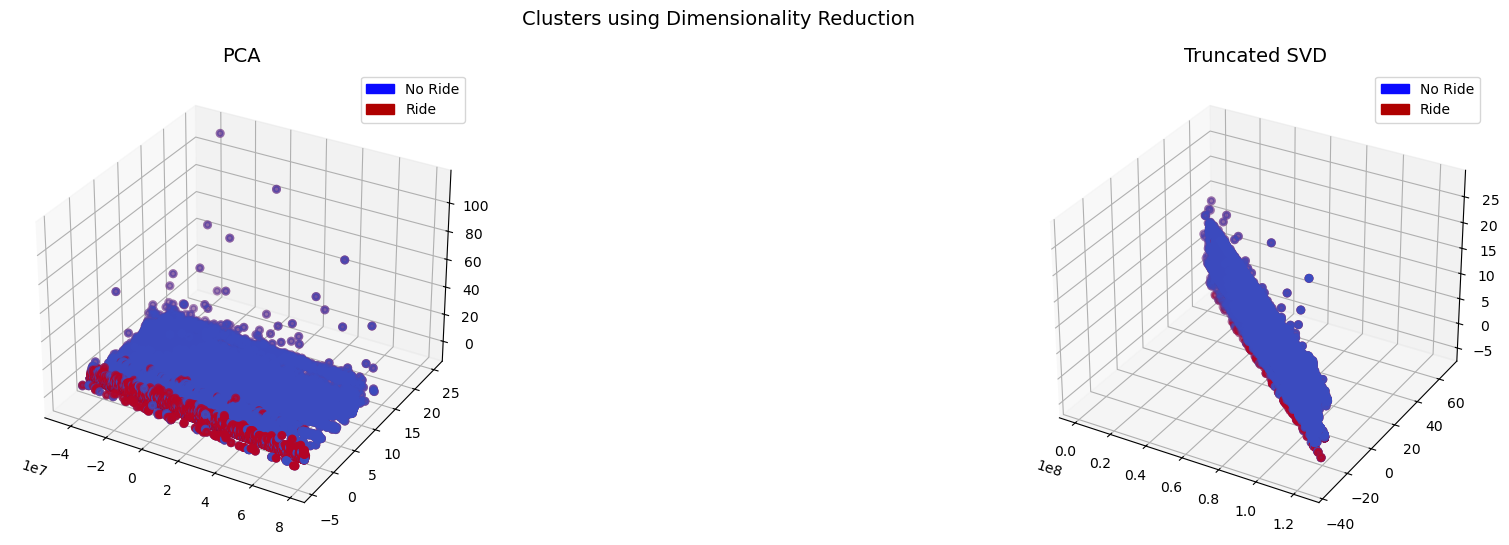

In [130]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
# fig = plt.figure(figsize=(24, 6))
# ax1 = fig.add_subplot(111, projection='3d')
# ax2 = fig.add_subplot(121, projection='3d')
# ax3 = fig.add_subplot(131, projection='3d')

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6), subplot_kw={'projection': '3d'})
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6), subplot_kw={'projection': '3d'})

# labels = ['No Event', 'Event']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Ride')
red_patch = mpatches.Patch(color='#AF0000', label='Ride')


# t-SNE scatter plot
# ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], X_train_reduced_tsne[:,2], c=(y_train == 0), cmap='coolwarm', label='No Ride', linewidths=2)
# ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], X_train_reduced_tsne[:,2], c=(y_train == 1), cmap='coolwarm', label='Ride', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
# ax1.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], X_train_reduced_pca[:,2], c=(y_train == 0), cmap='coolwarm', label='No Ride', linewidths=2)
# ax1.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], X_train_reduced_pca[:,2], c=(y_train == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], X_reduced_pca[:,2], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], X_reduced_pca[:,2], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax1.set_title('PCA', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
# ax2.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], X_train_reduced_svd[:,2], c=(y_train == 0), cmap='coolwarm', label='No Ride', linewidths=2)
# ax2.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], X_train_reduced_svd[:,2], c=(y_train == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], X_reduced_svd[:,2], c=(y == 0), cmap='coolwarm', label='No Ride', linewidths=2)
ax2.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], X_reduced_svd[:,2], c=(y == 1), cmap='coolwarm', label='Ride', linewidths=2)
ax2.set_title('Truncated SVD', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

plt.show()

In [131]:
scaler_pca = StandardScaler()

# Transform both training and validation data using the fitted scaler
# X_train_reduced_pca_scaled = rob_scaler_pca.fit_transform(X_train_reduced_pca)
# X_val_reduced_pca_scaled = rob_scaler_pca.transform(X_val_reduced_pca)
X_reduced_pca_scaled = scaler_pca.fit_transform(X_reduced_pca)
test_reduced_pca_scaled = scaler_pca.transform(test_reduced_pca)

scaler_svd = StandardScaler()

# Transform both training and validation data using the fitted scaler
X_reduced_svd_scaled = scaler_svd.fit_transform(X_reduced_svd)
test_reduced_svd_scaled = scaler_svd.transform(test_reduced_svd)

In [132]:
# X_train = np.concatenate([X_train, X_train_reduced_pca_scaled, X_train_reduced_svd_scaled], axis=1)
# X_val = np.concatenate([X_val, X_val_reduced_pca_scaled, X_val_reduced_svd_scaled], axis=1)

In [133]:
X = np.concatenate([X, X_reduced_pca_scaled, X_reduced_svd_scaled], axis=1)
test = np.concatenate([test, test_reduced_pca_scaled, test_reduced_svd_scaled], axis=1)

## Fit model on SMOTE oversampled training data

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size=.2, random_state =10)

In [57]:
X_train.shape

(64553, 74)

In [58]:
X_val.shape

(16139, 74)

In [59]:
y_train.shape

(64553,)

In [60]:
y_train.shape

(64553,)

In [142]:
from sklearn.calibration import CalibratedClassifierCV

smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

calibrated_clf = CalibratedClassifierCV(XGBClassifier())

calibrated_clf.fit(X_train_smote, y_train_smote)


dtrain_predictions = calibrated_clf.predict(X_train_smote)
dtrain_predprob = calibrated_clf.predict_proba(X_train_smote)[:,1]

#Predict test set:
dvalid_predictions = calibrated_clf.predict(X_val)
dvalid_predprob = calibrated_clf.predict_proba(X_val)[:,1]


report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")



Model Report on Training Data
Accuracy : 0.8859
F1 Score : 0.8974
Precision Score : 0.8152
Recall Score : 0.998
ROC AUC Score : 0.951256
Balanced Accuracy Score : 0.885875

Model Report on Validation Data
Accuracy : 0.8273
F1 Score : 0.8904
Precision Score : 0.8093
Recall Score : 0.9896
ROC AUC Score : 0.769340
Balanced Accuracy Score : 0.711029


In [78]:
# oversampled_data = data.copy()

# # Label encoding for categoricals
# for colname in oversampled_data.select_dtypes("object"):
#     oversampled_data[colname], _ = oversampled_data[colname].factorize()

# oversampled_X = oversampled_data.drop(['target', 'request_datetime'], axis=1)
# oversampled_y = oversampled_data['target']

# rob_scaler = RobustScaler()

# # Transform both training and validation data using the fitted scaler
# X_train_scaled = rob_scaler.fit_transform(X_train)
# X_val_scaled = rob_scaler.transform(X_val)

smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
# X_val_smote, y_val_smote = smt.fit_resample(X_val, y_val)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_smote, X_val, y_train_smote, y_val)

print(models)

 97%|█████████▋| 28/29 [25:23<01:35, 95.95s/it] 

[LightGBM] [Info] Number of positive: 45748, number of negative: 45748
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15763
[LightGBM] [Info] Number of data points in the train set: 91496, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [25:24<00:00, 52.56s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.83               0.72     0.72      0.81   
ExtraTreesClassifier               0.81               0.71     0.71      0.80   
XGBClassifier                      0.83               0.71     0.71      0.80   
CalibratedClassifierCV             0.81               0.71     0.71      0.79   
LogisticRegression                 0.81               0.71     0.71      0.80   
LinearSVC                          0.81               0.71     0.71      0.80   
LGBMClassifier                     0.83               0.71     0.71      0.80   
AdaBoostClassifier                 0.83               0.71     0.71      0.80   
RidgeClassifierCV                  0.81               0.71     0.71      0.79   
LinearDiscriminantAnalysis         0.81               0.71     0.71      0.79   
RidgeClassifier             

In [76]:
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_smote, y_smote = smt.fit_resample(X_train, y_train)


# Train a LightGBM model with the best hyperparameters
# lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
#                                      n_estimators=500,  
#                                      num_leaves=40,
#                                      max_depth=7,
#                                      reg_alpha = 0.4,
#                                      reg_lambda = 0.4,
#                                      min_child_weight=0.001,
#                                      min_child_samples = 20,
#                                      min_split_gain = 0, 
#                                      subsample_for_bin = 100000, 
#                                      subsample = 0.5,
#                                      colsample_bytree = 1, 
#                                      subsample_freq = 0,
#                                      objective= 'binary',
#                                      class_weight='balanced',
#                                      seed=10,
#                                      verbosity=-1)

lgb_model = SVC()
lgb_model.fit(X_smote, y_smote)

# Make predictions on the test set using the best model

#Predict training set:
dtrain_predictions = lgb_model.predict(X_smote)
dtrain_predprob = lgb_model.predict_proba(X_smote)[:,1]

#Predict test set:
dvalid_predictions = lgb_model.predict(X_val)
dvalid_predprob = lgb_model.predict_proba(X_val)[:,1]

AttributeError: predict_proba is not available when  probability=False

In [148]:
import sys

sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

In [ ]:
dtrain_predictions.shape

In [ ]:
def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score : %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score : %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

In [ ]:

report_generate(y_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")


In [ ]:
# LogisticRegression
# Model Report on Training Data
# Accuracy : 0.5
# F1 Score : 0.6667
# Precision Score : 0.5
# Recall Score : 1
# ROC AUC Score : 0.513256
# Balanced Accuracy Score : 0.500000

# Model Report on Validation Data
# Accuracy : 0.7087
# F1 Score : 0.8295
# Precision Score : 0.7087
# Recall Score : 1
# ROC AUC Score : 0.520136
# Balanced Accuracy Score : 0.500000

In [ ]:
# XGBoost
# Model Report on Training Data
# Accuracy : 0.8864
# F1 Score : 0.8978
# Precision Score : 0.8161
# Recall Score : 0.9977
# ROC AUC Score : 0.945047
# Balanced Accuracy Score : 0.886432

# Model Report on Validation Data
# Accuracy : 0.8274
# F1 Score : 0.8902
# Precision Score : 0.8105
# Recall Score : 0.9874
# ROC AUC Score : 0.767688
# Balanced Accuracy Score : 0.712808

In [ ]:
# RandomForestClassifier
# Model Report on Training Data
# Accuracy : 1
# F1 Score : 1
# Precision Score : 1
# Recall Score : 1
# ROC AUC Score : 1.000000
# Balanced Accuracy Score : 1.000000

# Model Report on Validation Data
# Accuracy : 0.8263
# F1 Score : 0.8881
# Precision Score : 0.817
# Recall Score : 0.9728
# ROC AUC Score : 0.747372
# Balanced Accuracy Score : 0.721355

In [ ]:
# Calibrated LGBM
# Model Report on Training Data
# Accuracy : 0.8773
# F1 Score : 0.8902
# Precision Score : 0.8053
# Recall Score : 0.9953
# ROC AUC Score : 0.925556
# Balanced Accuracy Score : 0.877295

# Model Report on Validation Data
# Accuracy : 0.8281
# F1 Score : 0.8911
# Precision Score : 0.8089
# Recall Score : 0.9919
# ROC AUC Score : 0.771851
# Balanced Accuracy Score : 0.710783

In [ ]:
# LGBM
# Model Report on Training Data
# Accuracy : 0.8976
# F1 Score : 0.907
# Precision Score : 0.8308
# Recall Score : 0.9986
# ROC AUC Score : 0.973536
# Balanced Accuracy Score : 0.897635

# Model Report on Validation Data
# Accuracy : 0.8269
# F1 Score : 0.8898
# Precision Score : 0.8104
# Recall Score : 0.9865
# ROC AUC Score : 0.767965
# Balanced Accuracy Score : 0.712477

In [ ]:
# Calibrated XGBoost
# Model Report on Training Data
# Accuracy : 0.8859
# F1 Score : 0.8974
# Precision Score : 0.8152
# Recall Score : 0.998
# ROC AUC Score : 0.951256
# Balanced Accuracy Score : 0.885875

# Model Report on Validation Data
# Accuracy : 0.8273
# F1 Score : 0.8904
# Precision Score : 0.8093
# Recall Score : 0.9896
# ROC AUC Score : 0.769340
# Balanced Accuracy Score : 0.711029

In [134]:
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_smote, y_smote = smt.fit_resample(X, y)


# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     min_child_weight=0.001,
                                     min_child_samples = 20,
                                     min_split_gain = 0, 
                                     subsample_for_bin = 100000, 
                                     subsample = 0.5,
                                     colsample_bytree = 1, 
                                     subsample_freq = 0,
                                     objective= 'binary',
                                     class_weight='balanced',
                                     seed=10,
                                     verbosity=-1)


lgb_model.fit(X_smote, y_smote)

# Make predictions on the test set using the best model

#Predict training set:
dtrain_predictions = lgb_model.predict(X_smote)
dtrain_predprob = lgb_model.predict_proba(X_smote)[:,1]

#Predict test set:
dtest_predictions = lgb_model.predict(test)
dtest_predprob = lgb_model.predict_proba(test)[:,1]

In [136]:
output = pd.DataFrame({'Id': test_data.index,
                       'target': dtest_predictions})
output.to_csv('submission.csv', index=False)

## Fitting Models on Imbalanced Data

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_reduced_svd_scaled, X_val_reduced_svd_scaled, y_train, y_val)

print(models)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_reduced_svd, X_val_reduced_svd, y_train, y_val)

print(models)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_reduced_pca_scaled, X_val_reduced_pca_scaled, y_train, y_val)

print(models)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_reduced_pca, X_val_reduced_pca, y_train, y_val)

print(models)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_reduced_tsne, X_val_reduced_tsne, y_train, y_val)

print(models)

In [ ]:
imbalanced_data = data.copy()

# Label encoding for categoricals
for colname in imbalanced_data.select_dtypes("object"):
    imbalanced_data[colname], _ = imbalanced_data[colname].factorize()

imbalanced_X = imbalanced_data.drop(['target', 'request_datetime'], axis=1)
imbalanced_y = imbalanced_data['target']

X_train, X_test, y_train, y_test = train_test_split(imbalanced_X, imbalanced_y, stratify = imbalanced_y, test_size=.25, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_val, y_train, y_val)

print(models)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

vc = VotingClassifier(estimators=[
        ('xgb', XGBClassifier()), ('lgbm', lgb.LGBMClassifier()), ('sgd', SGDClassifier(loss='log_loss')), 
        ('lr', LogisticRegression()), ('gnb', GaussianNB()), ('bnb', BernoulliNB()),
        ('knn', KNeighborsClassifier()), ('lda', LinearDiscriminantAnalysis()), 
        ('qda', QuadraticDiscriminantAnalysis()), ], voting='soft')


X_train_imbalanced, y_train_imbalanced, X_val_imbalanced, y_imbalanced = X_train.values, y_train.values, X_val.values, y_val.values

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=10,
                                     verbosity=-1)

vc.fit(X_train, y_train)
# X_train.to_numpy(), y_train, X_val.to_numpy(), y_val
# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = vc.predict(X_train)
dtrain_predprob = vc.predict_proba(X_train)[:,1]

#Predict training set:
dvalid_predictions = vc.predict(X_val)
dvalid_predprob = vc.predict_proba(X_val)[:,1]

report_generate(y_train, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

In [ ]:
def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score : %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score : %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define a range of values for the hyperparameters to search through
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Initialize an empty dictionary to store the best hyperparameters and their values
best_hyperparameters = {}
best_values = {}
 
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', num_class=1, boosting_type='gbdt', verbosity=-1)
 
# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring= "balanced_accuracy", cv=5, verbose=False)
 
# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)
 
# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())



# Train a LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = best_model.predict(X_train)
dtrain_predprob = best_model.predict_proba(X_train)[:,1]

#Predict training set:
dvalid_predictions = best_model.predict(X_val)
dvalid_predprob = best_model.predict_proba(X_val)[:,1]

report_generate(y_train, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

# Calculate accuracy
# accuracy = balanced_accuracy_score(y_val, y_pred)

# print('Best hyperparameters:', best_hyperparameters)
# print('Best values:', best_values)
# print(f'Accuracy with best hyperparameters: {accuracy:.4f}')

In [ ]:
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# We will undersample during cross validating
sss = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

# undersampled_data = data.copy()
imbalanced_X_train = X_train.copy()
imbalanced_X_val = X_val.copy()

# Label encoding for categoricals
# for colname in undersampled_data.select_dtypes("object"):
#     undersampled_data[colname], _ = undersampled_data[colname].factorize()

# undersample_X = undersampled_data.drop(['target', 'request_datetime'], axis=1)
# undersample_y = undersampled_data['target']

# for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
#     undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
#     undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

imbalanced_X_train = imbalanced_X_train.values
imbalanced_X_val = imbalanced_X_val.values
imbalanced_y_train = y_train.values
imbalanced_y_val = y_val.values

imbalanced_accuracy = []
imbalanced_precision = []
imbalanced_recall = []
imbalanced_f1 = []
imbalanced_auc = []
imbalanced_balanced_accuracy = []

imbalanced_val_accuracy = []
imbalanced_val_precision = []
imbalanced_val_recall = []
imbalanced_val_f1 = []
imbalanced_val_auc = []
imbalanced_val_balanced_accuracy = []

xgb_params = {
 'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
 'n_estimators' : [10, 100, 1000, 10000],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]      
 }

rand_xgb = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), xgb_params, n_iter=4)

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
# X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
# print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(imbalanced_X_train, imbalanced_y_train):
    # undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), XGBClassifier(objective= 'binary:logistic')) # SMOTE happens during Cross Validation not before..
    # undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    # undersample_prediction = undersample_model.predict(undersample_X[test])

    imbalanced_pipeline = make_pipeline(rand_xgb) # SMOTE happens during Cross Validation not before..
    imbalanced_model = imbalanced_pipeline.fit(imbalanced_X_train[train], imbalanced_y_train[train])
    best_est = rand_xgb.best_estimator_
    
    imbalanced_prediction = imbalanced_model.predict(imbalanced_X_train[test])
    # imbalanced_accuracy.append(imbalanced_pipeline.score(imbalanced_X_train[test], imbalanced_y_train[test]))
    imbalanced_accuracy.append(accuracy_score(imbalanced_y_train[test], imbalanced_prediction))
    imbalanced_precision.append(precision_score(imbalanced_y_train[test], imbalanced_prediction))
    imbalanced_recall.append(recall_score(imbalanced_y_train[test], imbalanced_prediction))
    imbalanced_f1.append(f1_score(imbalanced_y_train[test], imbalanced_prediction))
    imbalanced_auc.append(roc_auc_score(imbalanced_y_train[test], imbalanced_model.predict_proba(imbalanced_X_train[test])[:, 1]))
    imbalanced_balanced_accuracy.append(balanced_accuracy_score(imbalanced_y_train[test], imbalanced_prediction))

    imbalanced_val_prediction = imbalanced_model.predict(imbalanced_X_val)
    # imbalanced_val_accuracy.append(imbalanced_pipeline.score(imbalanced_X_val, imbalanced_y_val))
    imbalanced_val_accuracy.append(accuracy_score(imbalanced_y_val, imbalanced_val_prediction))
    imbalanced_val_precision.append(precision_score(imbalanced_y_val, imbalanced_val_prediction))
    imbalanced_val_recall.append(recall_score(imbalanced_y_val, imbalanced_val_prediction))
    imbalanced_val_f1.append(f1_score(imbalanced_y_val, imbalanced_val_prediction))
    imbalanced_val_auc.append(roc_auc_score(imbalanced_y_val, imbalanced_model.predict_proba(imbalanced_X_val)[:, 1]))
    imbalanced_val_balanced_accuracy.append(balanced_accuracy_score(imbalanced_y_val, imbalanced_val_prediction))
    


print("Training Data Accuracy Score: {:.2f}".format(np.mean(imbalanced_accuracy)))
print("Training Data Precision Score: {:.2f}".format(np.mean(imbalanced_precision)))
print("Training Data Recall Score: {:.2f}".format(np.mean(imbalanced_recall)))
print("Training Data F1 Score: {:.2f}".format(np.mean(imbalanced_f1)))
print("Training Data ROC AUC: {:.2f}".format(np.mean(imbalanced_auc)))
print("Training Data Balanced Accuracy Score: {:.2f}".format(np.mean(imbalanced_balanced_accuracy)))
print("*"*100)
print("Validation Data Accuracy Score: {:.2f}".format(np.mean(imbalanced_val_accuracy)))
print("Validation Data Precision Score: {:.2f}".format(np.mean(imbalanced_val_precision)))
print("Validation Data Recall Score: {:.2f}".format(np.mean(imbalanced_val_recall)))
print("Validation Data F1 Score: {:.2f}".format(np.mean(imbalanced_val_f1)))
print("Validation Data ROC AUC: {:.2f}".format(np.mean(imbalanced_val_auc)))
print("Validation Data Balanced Accuracy Score: {:.2f}".format(np.mean(imbalanced_val_balanced_accuracy)))

In [ ]:
def modelfit(alg, xtrain, ytrain, X_val, y_val, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(xtrain, label=ytrain)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    # alg.fit(xtrain, ytrain,eval_metric='auc')
    alg.fit(xtrain, ytrain)

    #Predict training set:
    dtrain_predictions = alg.predict(xtrain)
    dtrain_predprob = alg.predict_proba(xtrain)[:,1]

    #Predict training set:
    dvalid_predictions = alg.predict(X_val)
    dvalid_predprob = alg.predict_proba(X_val)[:,1]

    def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))


    report_generate(ytrain, dtrain_predictions, dtrain_predprob, "Training Data")
    report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'
# X_train = data.drop(['target','request_datetime'], axis=1)
# y_train = data['target']

modelfit(xgb1, X_train.to_numpy(), y_train, X_val.to_numpy(), y_val)

## XGBClassifier Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test1 = {
    'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators':[500, 1000, 2000, 3000]

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}


gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(X_train.to_numpy(),y_train)

gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,8,2)
}


gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch2.fit(X_train.to_numpy(),y_train)

gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test3 = {
 'max_depth':[6,7,8],
 'min_child_weight':[0,1,2]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch3.fit(X_train.to_numpy(),y_train)

gsearch3.best_params_, gsearch3.best_score_

In [ ]:
param_test4 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch4.fit(X_train.to_numpy(),y_train)

gsearch4.best_params_, gsearch4.best_score_

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb2, X_train.to_numpy(), y_train, X_val.to_numpy(), y_val)

In [ ]:
param_test5 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=7,
 min_child_weight=1, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch5.fit(X_train.to_numpy(),y_train)

gsearch5.best_params_, gsearch5.best_score_

In [ ]:
param_test6 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(40,70,5)]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=7,
 min_child_weight=1, gamma=0.3, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch6.fit(X_train.to_numpy(),y_train)

gsearch6.best_params_, gsearch6.best_score_

In [ ]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=7,
 min_child_weight=1, gamma=0.3, subsample=0.7, colsample_bytree=0.65,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch7.fit(X_train.to_numpy(),y_train)

gsearch7.best_params_, gsearch7.best_score_

In [ ]:
param_test8 = {
 'reg_alpha':[0, 1e-06, 5e-06, 1e-05, 5e-05]
}

gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=7,
 min_child_weight=1, gamma=0.3, subsample=0.7, colsample_bytree=0.65,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch8.fit(X_train.to_numpy(),y_train)

gsearch8.best_params_, gsearch8.best_score_

In [ ]:
xgb3 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=7,
 min_child_weight=1,
 gamma=0.3,
 subsample=0.7,
 colsample_bytree=0.65,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb3, X_train.to_numpy(), y_train, X_val.to_numpy(), y_val)

In [ ]:
# USING UNSCALED DATA
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
# New_df is from the random undersample data (fewer instances)
# , 'request_datetime', 
#                     'passenger_unique_identifier', 'driver_unique_identifier'

# temp_unscaled_data = uscaled_data.copy()

# # Label encoding for categoricals
# for colname in temp_unscaled_data.select_dtypes("object"):
#     temp_unscaled_data[colname], _ = temp_unscaled_data[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = temp_unscaled_data.dtypes == int
# X_train = temp_unscaled_data.drop(['target','request_datetime'], axis=1)
# y_train = temp_unscaled_data['target']

# uscaled_X_train = uscaled_X_train.drop(['request_datetime'], axis=1)
# uscaled_X_val = uscaled_X_val.drop(['request_datetime'], axis=1)

# uscaled_X_train.drop(["request_datetime"], axis=1, inplace=True)
# uscaled_X_val.drop(["request_datetime"], axis=1, inplace=True)

modelfit(xgb1, uscaled_X_train.to_numpy(), y_train, uscaled_X_val.to_numpy(), y_val)

In [ ]:
import lightgbm as lgb

X_train_imbalanced, y_train_imbalanced, X_val_imbalanced, y_imbalanced = X_train.values, y_train.values, X_val.values, y_val.values

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=10,
                                     verbosity=-1)

lgb_model.fit(X_train, y_train)
# X_train.to_numpy(), y_train, X_val.to_numpy(), y_val
# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = lgb_model.predict(X_train)
dtrain_predprob = lgb_model.predict_proba(X_train)[:,1]

#Predict training set:
dvalid_predictions = lgb_model.predict(X_val)
dvalid_predprob = lgb_model.predict_proba(X_val)[:,1]

report_generate(y_train, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

## Use Undersampling to Deal with Imbalanced Dataset

In [ ]:
# undersampled_data = data.copy()

# # Label encoding for categoricals
# for colname in undersampled_data.select_dtypes("object"):
#     undersampled_data[colname], _ = undersampled_data[colname].factorize()

# undersample_X = undersampled_data.drop(['target', 'request_datetime'], axis=1)
# undersample_y = undersampled_data['target']

# for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
#     undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
#     undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
nm = NearMiss(sampling_strategy='majority')
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train, y_train)
# X_val_nearmiss, y_val_nearmiss = nm.fit_resample(X_val.values, y_val.values)

# print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way
# X_train, X_test, y_train, y_test = train_test_split(X_nearmiss, y_nearmiss, stratify = y_nearmiss, test_size=.25, random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_nearmiss, X_val, y_train_nearmiss, y_val)

print(models)

In [ ]:
# xgb1 = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# We will undersample during cross validating
# sss = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

# undersampled_data = data.copy()
undersampled_X_train = X_train.copy()
undersampled_X_val = X_val.copy()

# Label encoding for categoricals
# for colname in undersampled_data.select_dtypes("object"):
#     undersampled_data[colname], _ = undersampled_data[colname].factorize()

# undersample_X = undersampled_data.drop(['target', 'request_datetime'], axis=1)
# undersample_y = undersampled_data['target']

# for train_index, test_index in sss.split(undersample_X, undersample_y):
#     print("Train:", train_index, "Test:", test_index)
#     undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
#     undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersampled_X_train = undersampled_X_train.values
undersampled_X_val = undersampled_X_val.values
undersample_y_train = y_train.values
undersample_y_val = y_val.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []
undersample_balanced_accuracy = []

undersample_val_accuracy = []
undersample_val_precision = []
undersample_val_recall = []
undersample_val_f1 = []
undersample_val_auc = []
undersample_val_balanced_accuracy = []

xgb_params = {
 'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
 'n_estimators' : [10, 100, 1000, 10000],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]      
 }

rand_xgb = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), xgb_params, n_iter=4)

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
# X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
# print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersampled_X_train, undersample_y_train):
    # undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), XGBClassifier(objective= 'binary:logistic')) # SMOTE happens during Cross Validation not before..
    # undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    # undersample_prediction = undersample_model.predict(undersample_X[test])

    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersampled_X_train[train], undersample_y_train[train])
    best_est = rand_xgb.best_estimator_
    
    undersample_prediction = undersample_model.predict(undersampled_X_train[test])
    # undersample_accuracy.append(undersample_pipeline.score(undersampled_X_train[test], undersample_y_train[test]))
    undersample_accuracy.append(accuracy_score(undersample_y_train[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y_train[test], undersample_model.predict_proba(undersampled_X_train[test])[:, 1]))
    undersample_balanced_accuracy.append(balanced_accuracy_score(undersample_y_train[test], undersample_prediction))

    undersample_val_prediction = undersample_model.predict(undersampled_X_val)
    # undersample_val_accuracy.append(undersample_pipeline.score(undersampled_X_val, undersample_y_val))
    undersample_val_accuracy.append(accuracy_score(undersample_y_val, undersample_val_prediction))
    undersample_val_precision.append(precision_score(undersample_y_val, undersample_val_prediction))
    undersample_val_recall.append(recall_score(undersample_y_val, undersample_val_prediction))
    undersample_val_f1.append(f1_score(undersample_y_val, undersample_val_prediction))
    undersample_val_auc.append(roc_auc_score(undersample_y_val, undersample_model.predict_proba(undersampled_X_val)[:, 1]))
    undersample_val_balanced_accuracy.append(balanced_accuracy_score(undersample_y_val, undersample_val_prediction))



print("Training Data Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Training Data Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Training Data Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("Training Data F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print("Training Data ROC AUC: {:.2f}".format(np.mean(undersample_auc)))
print("Training Data Balanced Accuracy Score: {:.2f}".format(np.mean(undersample_balanced_accuracy)))
print("*"*100)
print("Validation Data Accuracy Score: {:.2f}".format(np.mean(undersample_val_accuracy)))
print("Validation Data Precision Score: {:.2f}".format(np.mean(undersample_val_precision)))
print("Validation Data Recall Score: {:.2f}".format(np.mean(undersample_val_recall)))
print("Validation Data F1 Score: {:.2f}".format(np.mean(undersample_val_f1)))
print("Validation Data ROC AUC: {:.2f}".format(np.mean(undersample_val_auc)))
print("Validation Data Balanced Accuracy Score: {:.2f}".format(np.mean(undersample_val_balanced_accuracy)))

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

nm = NearMiss(sampling_strategy='majority')
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train.values, y_train.values)
X_val_nearmiss, y_val_nearmiss = nm.fit_resample(X_val.values, y_val.values)

modelfit(xgb1, X_train_nearmiss, y_train_nearmiss, X_val_nearmiss, y_val_nearmiss)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define a range of values for the hyperparameters to search through
param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

# Initialize an empty dictionary to store the best hyperparameters and their values
best_hyperparameters = {}
best_values = {}
 
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', num_class=1, boosting_type='gbdt', verbosity=-1)
 
# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring= "balanced_accuracy", cv=5, verbose=False)


nm = NearMiss(sampling_strategy='majority')
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train.values, y_train.values)
X_val_nearmiss, y_val_nearmiss = nm.fit_resample(X_val.values, y_val.values)

# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train_nearmiss, y_train_nearmiss)
 
# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())


def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train_nearmiss, y_train_nearmiss)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = best_model.predict(X_train_nearmiss)
dtrain_predprob = best_model.predict_proba(X_train_nearmiss)[:,1]

#Predict training set:
dvalid_predictions = best_model.predict(X_val_nearmiss)
dvalid_predprob = best_model.predict_proba(X_val_nearmiss)[:,1]

report_generate(y_train_nearmiss, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val_nearmiss, dvalid_predictions, dvalid_predprob, "Validation Data")

# Calculate accuracy
# accuracy = balanced_accuracy_score(y_val, y_pred)

# print('Best hyperparameters:', best_hyperparameters)
# print('Best values:', best_values)
# print(f'Accuracy with best hyperparameters: {accuracy:.4f}')


In [ ]:
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', verbosity=-1)
 
nm = NearMiss(sampling_strategy='majority')
X_train_nearmiss, y_train_nearmiss = nm.fit_resample(X_train.values, y_train.values)
X_val_nearmiss, y_val_nearmiss = nm.fit_resample(X_val.values, y_val.values)

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=10,
                                     verbosity=-1)

lgb_model.fit(X_train_nearmiss, y_train_nearmiss)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = lgb_model.predict(X_train_nearmiss)
dtrain_predprob = lgb_model.predict_proba(X_train_nearmiss)[:,1]

#Predict training set:
dvalid_predictions = lgb_model.predict(X_val_nearmiss)
dvalid_predprob = lgb_model.predict_proba(X_val_nearmiss)[:,1]

report_generate(y_train_nearmiss, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val_nearmiss, dvalid_predictions, dvalid_predprob, "Validation Data")

## Use Oversampling to Deal with Imbalanced Dataset

In [ ]:
# oversampled_data = data.copy()

# # Label encoding for categoricals
# for colname in oversampled_data.select_dtypes("object"):
#     oversampled_data[colname], _ = oversampled_data[colname].factorize()

# oversampled_X = oversampled_data.drop(['target', 'request_datetime'], axis=1)
# oversampled_y = oversampled_data['target']

# rob_scaler = RobustScaler()

# # Transform both training and validation data using the fitted scaler
# X_train_scaled = rob_scaler.fit_transform(X_train)
# X_val_scaled = rob_scaler.transform(X_val)

smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
# X_val_smote, y_val_smote = smt.fit_resample(X_val, y_val)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_smote, X_val, y_train_smote, y_val)

print(models)

## LogisticRegression                   

In [ ]:
rob_scaler = RobustScaler()

# Transform both training and validation data using the fitted scaler
X_train_scaled = rob_scaler.fit_transform(X_train)
X_val_scaled = rob_scaler.transform(X_val)

# Initialize the LightGBM classifier
# lgb_model = lgb.LGBMClassifier(objective='binary', seed=10, verbosity=-1)
 
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_train_smote, y_train_smote = smt.fit_resample(X_train_scaled, y_train)
# X_val_smote, y_val_smote = smt.fit_resample(X_val_scaled, y_val)

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score : %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score : %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

early_stopping_rounds = 10  # Stop training if validation loss doesn't improve for 10 rounds
eval_metric = "balanced_accuracy"
# Train a LightGBM model with the best hyperparameters
# lgb_model = lgb.LGBMClassifier(learning_rate =0.05,
#                                      n_estimators=1000,
#                                      num_leaves=50,
#                                      max_depth=9,
#                                      reg_alpha = 0.6,
#                                      reg_lambda = 0,                                                       
#                                      min_child_weight=0.1,
#                                      min_child_samples=40,
#                                      subsample_for_bin = 100000,
#                                      min_split_gain = 0.1,                                                   
#                                      subsample=0.5,
#                                      colsample_bytree=0.9,
#                                      subsample_freq = 0,
#                                      objective= 'binary',
#                                      nthread=4,
#                                      class_weight='balanced',
#                                      # eval_metric=eval_metric,
#                                      # early_stopping_rounds=early_stopping_rounds,
#                                      seed=10,
#                                      verbosity=-1)
lr_model = LogisticRegression()

lr_model.fit(X_train_smote, y_train_smote)
             # eval_set=[(X_val_smote, y_val_smote)], 
             #  eval_metric=eval_metric,)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)
# temp_thresh = 0.5499999999999999
#Predict training set:
dtrain_predictions = lr_model.predict(X_train_smote)
dtrain_predprob = lr_model.predict_proba(X_train_smote)[:,1]
# dtrain_predictions = (dtrain_predprob >= temp_thresh).astype('int')

# predicted = (dtrain_predprob >= temp_thresh).astype('int')
# print(predicted)
#Predict training set:
dvalid_predictions = lr_model.predict(X_val_scaled)
dvalid_predprob = lr_model.predict_proba(X_val_scaled)[:,1]
# dvalid_predictions = (dvalid_predprob >= temp_thresh).astype('int')

report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

## XGBClassifier

In [ ]:
# undersampled_data = data.copy()
oversampled_X_train = X_train.copy()
oversampled_X_val = X_val.copy()


# Classifier with optimal parameters
# xgb_sm = gsearch7.best_estimator_
# xgb_sm = XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

oversampled_X_train = oversampled_X_train.values
oversampled_X_val = oversampled_X_val.values
oversample_y_train = y_train.values
oversample_y_val = y_val.values

oversample_accuracy = []
oversample_precision = []
oversample_recall = []
oversample_f1 = []
oversample_auc = []
oversample_balanced_accuracy = []

oversample_val_accuracy = []
oversample_val_precision = []
oversample_val_recall = []
oversample_val_f1 = []
oversample_val_auc = []
oversample_val_balanced_accuracy = []

# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
xgb_params = {
 'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
 'n_estimators' : [10, 100, 1000, 10000],
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
 'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]      
 }

rand_xgb = RandomizedSearchCV(XGBClassifier(objective= 'binary:logistic'), xgb_params, n_iter=4)


for train, test in sss.split(oversampled_X_train, oversample_y_train):
    oversample_pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_xgb) # SMOTE happens during Cross Validation not before..
    oversample_model = oversample_pipeline.fit(oversampled_X_train[train], oversample_y_train[train])
    best_est = rand_xgb.best_estimator_
    
    oversample_prediction = oversample_model.predict(oversampled_X_train[test])
    # oversample_accuracy.append(oversample_pipeline.score(oversampled_X_train[test], oversample_y_train[test]))
    oversample_accuracy.append(accuracy_score(oversample_y_train[test], oversample_prediction))
    oversample_precision.append(precision_score(oversample_y_train[test], oversample_prediction))
    oversample_recall.append(recall_score(oversample_y_train[test], oversample_prediction))
    oversample_f1.append(f1_score(oversample_y_train[test], oversample_prediction))
    oversample_auc.append(roc_auc_score(oversample_y_train[test], oversample_model.predict_proba(oversampled_X_train[test])[:, 1]))
    oversample_balanced_accuracy.append(balanced_accuracy_score(oversample_y_train[test], oversample_prediction))

    oversample_val_prediction = oversample_model.predict(oversampled_X_val)
    # oversample_val_accuracy.append(oversample_pipeline.score(oversampled_X_val, oversample_y_val))
    oversample_val_accuracy.append(accuracy_score(oversample_y_val, oversample_val_prediction))
    oversample_val_precision.append(precision_score(oversample_y_val, oversample_val_prediction))
    oversample_val_recall.append(recall_score(oversample_y_val, oversample_val_prediction))
    oversample_val_f1.append(f1_score(oversample_y_val, oversample_val_prediction))
    oversample_val_auc.append(roc_auc_score(oversample_y_val, oversample_model.predict_proba(oversampled_X_val)[:, 1]))
    oversample_val_balanced_accuracy.append(balanced_accuracy_score(oversample_y_val, oversample_val_prediction))


print("Training Data Accuracy Score: {:.2f}".format(np.mean(oversample_accuracy)))
print("Training Data Precision Score: {:.2f}".format(np.mean(oversample_precision)))
print("Training Data Recall Score: {:.2f}".format(np.mean(oversample_recall)))
print("Training Data F1 Score: {:.2f}".format(np.mean(oversample_f1)))
print("Training Data ROC AUC: {:.2f}".format(np.mean(oversample_auc)))
print("Training Data Balanced Accuracy Score: {:.2f}".format(np.mean(oversample_balanced_accuracy)))
print("*"*100)
print("Validation Data Accuracy Score: {:.2f}".format(np.mean(oversample_val_accuracy)))
print("Validation Data Precision Score: {:.2f}".format(np.mean(oversample_val_precision)))
print("Validation Data Recall Score: {:.2f}".format(np.mean(oversample_val_recall)))
print("Validation Data F1 Score: {:.2f}".format(np.mean(oversample_val_f1)))
print("Validation Data ROC AUC: {:.2f}".format(np.mean(oversample_val_auc)))
print("Validation Data Balanced Accuracy Score: {:.2f}".format(np.mean(oversample_val_balanced_accuracy)))

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train.values, y_train.values)
X_val_smote, y_val_smote = smt.fit_resample(X_val.values, y_val.values)

modelfit(xgb1, X_train_smote, y_train_smote, X_val_smote, y_val_smote)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the hyperparameters to search through
# param_grid = {
#     'learning_rate' :[1e-3, 1e-2, 0.1, 0.2, 0.3],
#     'n_estimators' : [10, 100, 1000, 10000],
#     'max_depth':range(3,10,2),
#     'min_child_weight':range(1,6,2),
#     'gamma':[i/10.0 for i in range(0,5)],
#     'subsample':[i/10.0 for i in range(6,10)],
#     'colsample_bytree':[i/10.0 for i in range(6,10)],
#     'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
#     'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],
#     # 'num_leaves': [5, 20, 31, ],
#     # 'learning_rate': [0.05, 0.1, 0.2],
#     # 'n_estimators': [50, 100, 150]
# }


param_grid = {
    'learning_rate' :[1e-3, 0.1],
    'n_estimators' : [100, 10000],
    'max_depth':range(5,8,2),
    # 'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(1,3)],
    'subsample':[i/10.0 for i in range(6,9, 2)],
    'colsample_bytree':[i/10.0 for i in range(6,9, 2)],
    'reg_alpha':[1e-5, 1e-2, 0.1,],
    'reg_lambda':[1e-5, 1e-2, 0.1,],
    # 'num_leaves': [5, 20, 31, ],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'n_estimators': [50, 100, 150]
}

# Best hyperparameters: ['colsample_bytree', 'gamma', 'learning_rate', 'max_depth', 'n_estimators', 'reg_alpha', 'reg_lambda', 'subsample']
# Best values: [0.6, 0.1, 0.1, 7, 100, 1e-05, 0.1, 0.6]# Initialize an empty dictionary to store the best hyperparameters and their values

best_hyperparameters = {}
best_values = {}
 
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', verbosity=-1)
 
# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(lgb_classifier, param_grid,
                           scoring= "balanced_accuracy", cv=5, verbose=False,
                           n_jobs=-1)


smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train.values, y_train.values)
X_val_smote, y_val_smote = smt.fit_resample(X_val.values, y_val.values)

# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train_nearmiss, y_train_nearmiss)
 
# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())


def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = best_model.predict(X_train_smote)
dtrain_predprob = best_model.predict_proba(X_train_smote)[:,1]

#Predict training set:
dvalid_predictions = best_model.predict(X_val_smote)
dvalid_predprob = best_model.predict_proba(X_val_smote)[:,1]

report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val_smote, dvalid_predictions, dvalid_predprob, "Validation Data")

# Calculate accuracy
# accuracy = balanced_accuracy_score(y_val, y_pred)

# print('Best hyperparameters:', best_hyperparameters)
# print('Best values:', best_values)
# print(f'Accuracy with best hyperparameters: {accuracy:.4f}')


In [ ]:
print('Best hyperparameters:', best_hyperparameters)
print('Best values:', best_values)

In [ ]:
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', verbosity=-1)
 
smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train.values, y_train.values)
X_val_smote, y_val_smote = smt.fit_resample(X_val.values, y_val.values)

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt', verbosity=-1)
lgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = lgb_model.predict(X_train_smote)
dtrain_predprob = lgb_model.predict_proba(X_train_smote)[:,1]

#Predict training set:
dvalid_predictions = lgb_model.predict(X_val_smote)
dvalid_predprob = lgb_model.predict_proba(X_val_smote)[:,1]

report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val_smote, dvalid_predictions, dvalid_predprob, "Validation Data")

In [ ]:
# Initialize the LightGBM classifier
# lgb_model = lgb.LGBMClassifier(objective='binary', seed=10, verbosity=-1)
 
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
# X_val_smote, y_val_smote = smt.fit_resample(X_val_scaled, y_val)

early_stopping_rounds = 10  # Stop training if validation loss doesn't improve for 10 rounds
eval_metric = "balanced_accuracy"
# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     min_child_weight=0.001,
                                     min_child_samples = 20,
                                     min_split_gain = 0, 
                                     subsample_for_bin = 100000, 
                                     subsample = 0.5,
                                     colsample_bytree = 1, 
                                     subsample_freq = 0,
                                     objective= 'binary',
                                     # nthread=4,
                                     class_weight='balanced',
                                     # eval_metric=eval_metric,
                                     # early_stopping_rounds=early_stopping_rounds,
                                     seed=10,
                                     verbosity=-1)


lgb_model.fit(X_train_smote, y_train_smote)
             # eval_set=[(X_val_smote, y_val_smote)], 
             #  eval_metric=eval_metric,)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)
temp_thresh = 0.5499999999999999
#Predict training set:
dtrain_predictions = lgb_model.predict(X_train_smote)
dtrain_predprob = lgb_model.predict_proba(X_train_smote)[:,1]
# dtrain_predictions = (dtrain_predprob >= temp_thresh).astype('int')

# predicted = (dtrain_predprob >= temp_thresh).astype('int')
# print(predicted)
#Predict training set:
dvalid_predictions = lgb_model.predict(X_val)
dvalid_predprob = lgb_model.predict_proba(X_val)[:,1]
# dvalid_predictions = (dvalid_predprob >= temp_thresh).astype('int')

report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming you have true labels (y_true) and predicted labels (y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, dvalid_predictions)

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, labels, title):
  """
  Plots a confusion matrix with labels and title.
  """
  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap="Blues")
  plt.colorbar()
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)

  # Normalize entries for better visualization
  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title(title)
  plt.grid(False)
  plt.tight_layout()
  plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['0', '1'], title='Confusion Matrix')


## Tune LGBMCLassifier Hyperparameters

In [ ]:
X_train_hyp, X_val_hyp, y_train_hyp, y_val_hyp = train_test_split(X_train, y_train, stratify = y_train, test_size=.2, random_state =10)

# Initialize the LightGBM classifier
# lgb_model = lgb.LGBMClassifier(objective='binary', seed=10, verbosity=-1)
 
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_train_hyp_smote, y_train_hyp_smote = smt.fit_resample(X_train_hyp, y_train_hyp)

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test1 = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[100, 500, 1000, 2000, 3000],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch1 = GridSearchCV(estimator = lgb.LGBMClassifier(
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     early_stopping_rounds=early_stopping_rounds,
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch1.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)], 
              eval_metric=eval_metric)

gsearch1.best_params_, gsearch1.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test2 = {
    'num_leaves': [20, 30, 40, 50],
    'max_depth':[5, 7, 9, 11],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch2 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,                                
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     early_stopping_rounds=early_stopping_rounds,
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch2.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)],
              eval_metric=eval_metric)

gsearch2.best_params_, gsearch2.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test3 = {
    'reg_alpha': [0, 0.2, 0.4, 0.6],
    'reg_lambda':[0, 0.2, 0.4, 0.6],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch3 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     early_stopping_rounds=early_stopping_rounds,
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch3.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)],
              eval_metric=eval_metric)

gsearch3.best_params_, gsearch3.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test4 = {
    'min_child_weight': [1e-3, 1e-4, 5e-4],
    'min_child_samples':[10, 15, 20],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch4 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     early_stopping_rounds=early_stopping_rounds,                                    
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch4.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)], 
              eval_metric=eval_metric)

gsearch4.best_params_, gsearch4.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test5 = {
    'subsample_for_bin': [1000, 10000, 100000, 200000],
    'min_split_gain':[0, 1e-1, 1e-2, 1e-3],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch5 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     min_child_weight=0.001,
                                     min_child_samples = 20,
                                     
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     
                                     early_stopping_rounds=early_stopping_rounds,                                                                                           
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch5.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)], 
              eval_metric=eval_metric)

gsearch5.best_params_, gsearch5.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test6 = {
    'subsample': [0.5, 0.7, 0.9, 1],
    'min_child_samples':[10, 20, 30, 40],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch6 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     min_child_weight=0.001,
                                     min_child_samples = 20,
                                     min_split_gain = 0, 
                                     subsample_for_bin = 100000,  
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',                                                           
                                     early_stopping_rounds=early_stopping_rounds,  
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch6.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)], 
              eval_metric=eval_metric)

gsearch6.best_params_, gsearch6.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for learning_rate and other hyperparameters you want to tune
param_test7 = {
    'subsample_freq': [0, 2, 4, 6],
    'colsample_bytree':[0.3, 0.5, 0.7, 0.9, 1],

    # Add other hyperparameters here (e.g., max_depth, min_child_weight)
}

early_stopping_rounds = 10
eval_metric = "roc_auc"

gsearch7 = GridSearchCV(estimator = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=500,  
                                     num_leaves=40,
                                     max_depth=7,
                                     reg_alpha = 0.4,
                                     reg_lambda = 0.4,
                                     min_child_weight=0.001,
                                     min_child_samples = 20,
                                     min_split_gain = 0, 
                                     subsample_for_bin = 100000, 
                                     subsample = 0.5,
                                     objective= 'binary',
                                     nthread=4,
                                     class_weight='balanced',
                                     early_stopping_rounds=early_stopping_rounds, 
                                     seed=10,
                                     verbosity=-1), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=-1, cv=5)

gsearch7.fit(X_train_hyp_smote, y_train_hyp_smote,
            eval_set=[(X_val_hyp, y_val_hyp)], 
              eval_metric=eval_metric)

gsearch7.best_params_, gsearch7.best_score_

## Voting Method

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

vc = VotingClassifier(estimators=[
 #        ('xgb', XGBClassifier(learning_rate =0.1,
 # n_estimators=1000,
 # max_depth=5,
 # min_child_weight=1,
 # gamma=0,
 # subsample=0.8,
 # colsample_bytree=0.8,
 # objective= 'binary:logistic',
 # nthread=4,
 # scale_pos_weight=1,
 # seed=27)), 
    ('lgbm', lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=10,
                                     verbosity=-1)),
    # ('sgd', SGDClassifier(loss='log_loss')), 
        # ('lr', LogisticRegression()),
    # ('gnb', GaussianNB()),
    # ('bnb', BernoulliNB()),
        # ('knn', KNeighborsClassifier()), 
    # ('lda', LinearDiscriminantAnalysis()), 
    #     ('qda', QuadraticDiscriminantAnalysis()),
], voting='soft')


smt = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smt.fit_resample(X_train.values, y_train.values)
X_val_smote, y_val_smote = smt.fit_resample(X_val.values, y_val.values)

def report_generate(ytrain, dtrain_predictions, dtrain_predprob=None, split_type=None):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))


vc.fit(X_train_smote, y_train_smote)

# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = vc.predict(X_train_smote)
dtrain_predprob = vc.predict_proba(X_train_smote)[:,1]

#Predict training set:
dvalid_predictions = vc.predict(X_val_smote)
dvalid_predprob = vc.predict_proba(X_val_smote)[:,1]

report_generate(y_train_smote, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val_smote, dvalid_predictions, dvalid_predprob, "Validation Data")

## BalancedBaggingClassifier

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import lightgbm as lgb

# X_train_imbalanced, y_train_imbalanced, X_val_imbalanced, y_imbalanced = X_train.values, y_train.values, X_val.values, y_val.values

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
                                     n_estimators=1000,
                                     max_depth=5,
                                     min_child_weight=1,
                                     gamma=0,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     objective= 'binary',
                                     nthread=4,
                                     scale_pos_weight=1,
                                     seed=10,
                                     verbosity=-1)

classifier = BalancedBaggingClassifier(base_estimator=lgb_model,
                                sampling_strategy='not majority',
                                replacement=True,
                                random_state=10)

classifier.fit(X_train, y_train)
# X_train.to_numpy(), y_train, X_val.to_numpy(), y_val
# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
dtrain_predictions = classifier.predict(X_train)
dtrain_predprob = classifier.predict_proba(X_train)[:,1]

#Predict training set:
dvalid_predictions = classifier.predict(X_val)
dvalid_predprob = classifier.predict_proba(X_val)[:,1]

report_generate(y_train, dtrain_predictions, dtrain_predprob, "Training Data")
report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")

## Threshold Moving

In [ ]:
# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier(objective='binary', seed=10, verbosity=-1)
 
smt = SMOTE(sampling_strategy='minority', random_state=10)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

def report_generate(ytrain, dtrain_predictions, dtrain_predprob, split_type):
        #Print model report:
        print("\nModel Report on "+split_type)
        print("Accuracy : %.4g" % accuracy_score(ytrain, dtrain_predictions))
        print("F1 Score : %.4g" % f1_score(ytrain, dtrain_predictions))
        print("Precision Score : %.4g" % precision_score(ytrain, dtrain_predictions))
        print("Recall Score : %.4g" % recall_score(ytrain, dtrain_predictions))
        print("ROC AUC Score (Train): %f" % roc_auc_score(ytrain, dtrain_predprob))
        print("Balanced Accuracy Score (Train): %f" % balanced_accuracy_score(ytrain, dtrain_predictions))

# Train a LightGBM model with the best hyperparameters
# lgb_model = lgb.LGBMClassifier(learning_rate =0.1,
#                                      n_estimators=1000,
#                                      max_depth=5,
#                                      min_child_weight=1,
#                                      gamma=0,
#                                      subsample=0.8,
#                                      colsample_bytree=0.8,
#                                      objective= 'binary',
#                                      nthread=4,
#                                      scale_pos_weight=1,
#                                      seed=10,
#                                      verbosity=-1)

lgb_model.fit(X_train_smote, y_train_smote)
# X_train.to_numpy(), y_train, X_val.to_numpy(), y_val
# Make predictions on the test set using the best model
# y_pred = best_model.predict(X_val)

#Predict training set:
# dtrain_predictions = lgb_model.predict(X_train)
# dtrain_predprob = lgb_model.predict_proba(X_train)[:,1]

# #Predict training set:
# dvalid_predictions = lgb_model.predict(X_val)
# dvalid_predprob = lgb_model.predict_proba(X_val)[:,1]

# report_generate(y_train, dtrain_predictions, dtrain_predprob, "Training Data")
# report_generate(y_val, dvalid_predictions, dvalid_predprob, "Validation Data")


step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = lgb_model.predict_proba(X_train_smote) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_train_smote, predicted))
    if roc_score<roc_auc_score(y_train_smote, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_train_smote, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)